# Assignment No-4


## Question No-1

### Problem Statement - Delivery_time -> Predict delivery time using sorting time 


In [1]:
# importing the required packages & libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from numpy.polynomial.polynomial import polyfit
from sklearn.linear_model import LinearRegression

In [2]:
# reading & attaching the data set
data_delivery = pd.read_csv("delivery_time.csv")

In [4]:
data_delivery.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


#### therefore, the given data set is having 2 variables namely Delivery Time & Sorting Time

In [5]:
data_delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [8]:
data_delivery.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


### the above result explains that the standard deviation of Delivery time is higher than the Sorting time
### Average Delivery Time is 16.79 & average Sorting Time is 6.19

In [10]:
data_delivery['Delivery Time'].isnull().sum()


0

In [11]:
data_delivery['Sorting Time'].isnull().sum()

0

#### Hence there is no NA in the given data set

## Scatter Plot to understand about the data

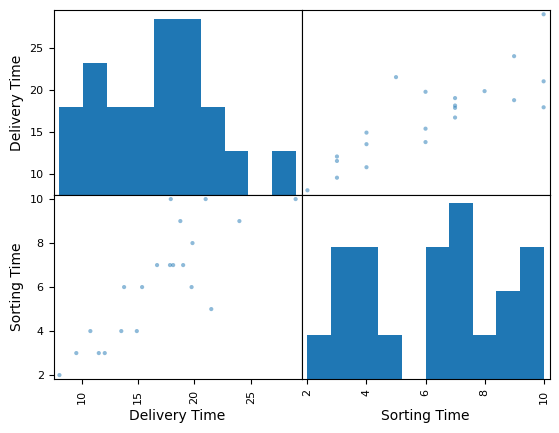

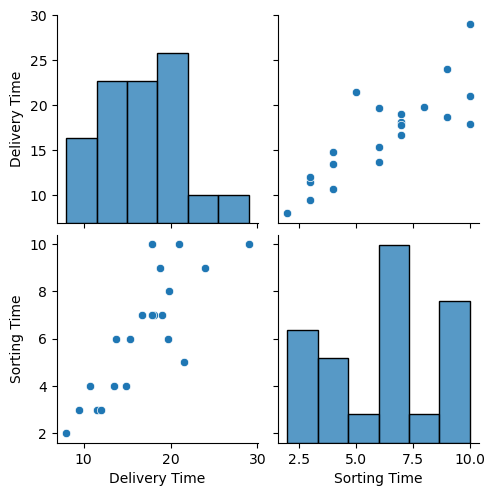

In [12]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
pd.plotting.scatter_matrix(data_delivery)
sns.pairplot(data_delivery)


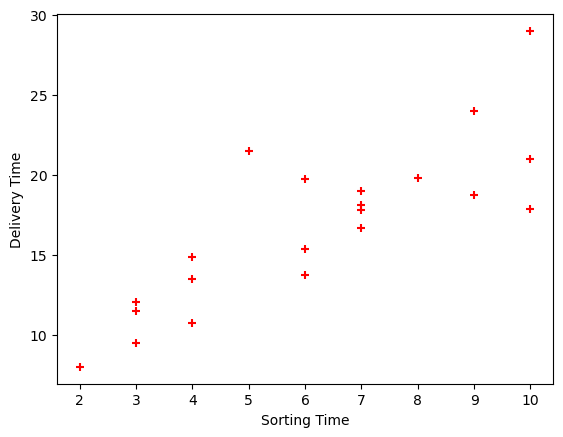

In [20]:
#matplotlib inline
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.scatter(data_delivery['Sorting Time'],data_delivery['Delivery Time'],color='red',marker='+')

#### the above plot reflects that the Delivery Time & Sorting Time are positively related with some outliers

# Correlation

In [16]:
data_delivery.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


### The above result indicated that the correlation between the 2 variables, i.e., the Delivery Time & Sorting Time is very strong with approx 82.2%

# Regression Models

### Model No-1: undertaking regression model with no transformation of the given data

In [17]:
x = data_delivery['Sorting Time'] #independent Variable 
y = data_delivery['Delivery Time'] # dependent variable

In [18]:
model1 = sm.OLS(y,x).fit()

In [19]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                              424.5
Date:                Mon, 06 Nov 2023   Prob (F-statistic):                    6.12e-15
Time:                        20:42:43   Log-Likelihood:                         -57.349
No. Observations:                  21   AIC:                                      116.7
Df Residuals:                      20   BIC:                                      117.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     2.5652      0.125     20.603      0.000       2.306       2.825
==============================================================================
Omnibus:                        1.504   Durbin-Watson:                   1.305
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                0.508
Skew:                          -0.348   Prob(JB):                        0.776
Kurtosis:                       3.310   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### The above result of the regression model 1 has R square with 95% and Adjusted R square with 95% which is considered as good model. But we will also explore the other models and then we will choose the best model.

### Model No-2: Underataking regression model with Log Transformation of the given data

In [21]:
#transforming the dependent & independent variables into log form
x_log = np.log(data_delivery['Sorting Time'])
y_log = np.log(data_delivery['Delivery Time'])

In [23]:
model2 = sm.OLS(y_log, x_log).fit()
predictions = model2.predict(x_log)

In [24]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              688.7
Date:                Mon, 06 Nov 2023   Prob (F-statistic):                    5.72e-17
Time:                        20:52:16   Log-Likelihood:                         -13.899
No. Observations:                  21   AIC:                                      29.80
Df Residuals:                      20   BIC:                                      30.84
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     1.5396      0.059     26.244      0.000       1.417       1.662
==============================================================================
Omnibus:                        1.636   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.441   Jarque-Bera (JB):                1.137
Skew:                           0.304   Prob(JB):                        0.566
Kurtosis:                       2.035   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### The above result of the regression model 2 has R square with 97% and Adjusted R square with 97% which is better than the previous model no -1. 

### Model No-3: Square Root Transformation of X & Y

In [25]:
#Transforming the dependent & independent variables into square root

x_sqrt = np.sqrt(data_delivery['Sorting Time'])
y_sqrt = np.sqrt(data_delivery['Delivery Time'])

In [27]:
model3 = sm.OLS(y_sqrt, x_sqrt).fit()
predictions = model3.predict(x_sqrt)

In [28]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              1542.
Date:                Mon, 06 Nov 2023   Prob (F-statistic):                    2.10e-20
Time:                        21:02:17   Log-Likelihood:                         -13.658
No. Observations:                  21   AIC:                                      29.32
Df Residuals:                      20   BIC:                                      30.36
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     1.6364      0.042     39.267      0.000       1.549       1.723
==============================================================================
Omnibus:                        0.176   Durbin-Watson:                   1.461
Prob(Omnibus):                  0.916   Jarque-Bera (JB):                0.231
Skew:                          -0.179   Prob(JB):                        0.891
Kurtosis:                       2.632   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### The above results shao model with highest R square of 98% which much better than the earlier 2 models.

# Output Interpretation

We will select Model 3 as it has the best R squared value with 98.7%

1 - p-value < 0.01
Thus the model is accepted

2 - coefficient == 1.64
Which indicates that if the value of Sorting Time is increased by 1, the predicted value of Delivery Time will increase by 1.64

3 - R-sqared == 0.987
That is the selected model explains 98.7% of the variance in dependent variable